In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
# linkage : 계층형 군집분석, dendrogram : 계층구조 나무, cluster : linkage로부터 얻은 값
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# KMeans 군집분석, DBSCAN 군집분석
from sklearn.cluster import KMeans, DBSCAN

In [3]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/직무능력평가.csv', engine='python')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [4]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [5]:
df_raw_y = df_raw_scaled[:, 0]
df_raw_x = df_raw_scaled[:, 1::]

Text(0, 0.5, 'sample index')

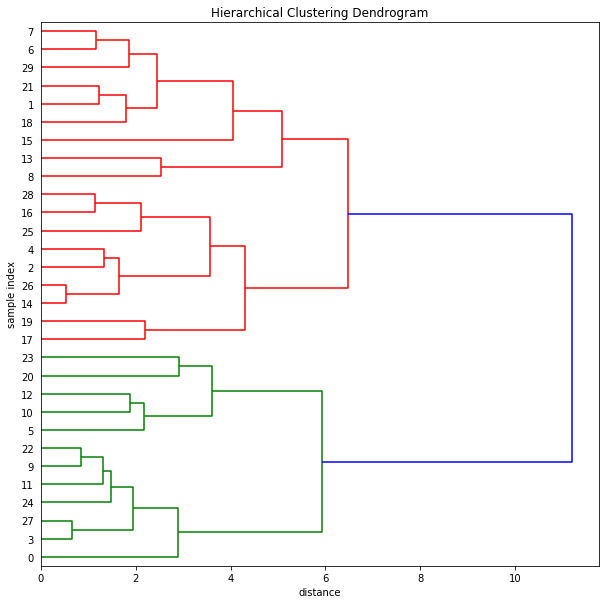

In [7]:
# Dendrogram
# 연결 : ward, 거리 계산 : Euclidean
Z_ward = linkage(df_raw_x, method='ward', metric='euclidean')
# 연결 : average, 거리 계산 : Euclidean
Z_average = linkage(df_raw_x, method='average', metric='euclidean')
# 연결 : average, 거리 계산 : Minkowski
Z_Minkowski = linkage(df_raw_x, method='average', metric='minkowski')

# 덴드로그램[연결 : ward, 거리 계산 : Euclidean]
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
# DataFrame 변경 : Z_ward, Z_average, Z_Minkowski
dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

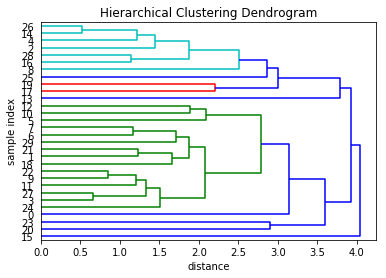

In [8]:
dendrogram(Z_average, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

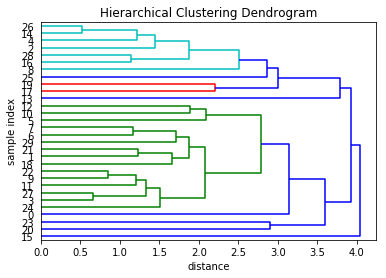

In [9]:
dendrogram(Z_Minkowski, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

In [10]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical = fcluster(Z = Z_ward, t=5, criterion='distance')
# 데이터에 계층형 군집 결과 입력
df_raw['ClusterHierarchical'] = cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [11]:
# 집계 함수를 이용한 군집별 데이터 용약
ds_summary_hc = df_raw.groupby('ClusterHierarchical').agg(['min', 'mean', 'max'])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.reset_index(inplace=True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [12]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster' : cluster_range, 'Error' : clus_error})
ds_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.932631
3,4,80.235930
4,5,66.716059
5,6,57.620522
6,7,51.379820
7,8,42.326950
8,9,38.735626
9,10,32.572300


Text(0, 0.5, 'Sum of squared distance')

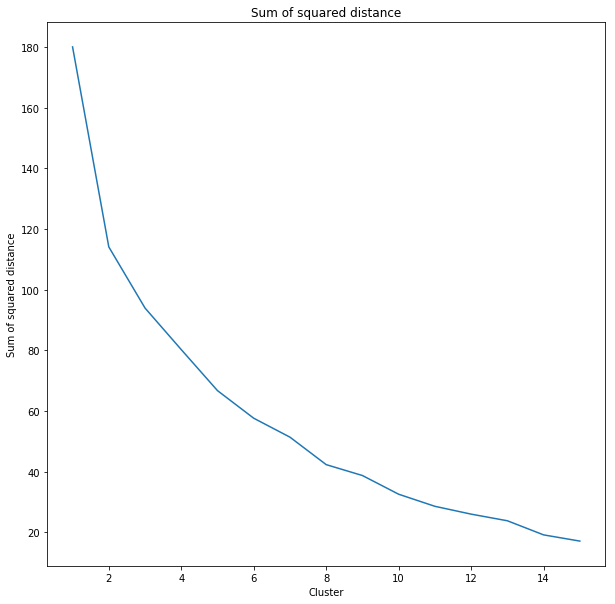

In [13]:
plt.figure(figsize=(10, 10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title("Sum of squared distance")
plt.xlabel('Cluster')
plt.ylabel('Sum of squared distance')

In [14]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw['ClusterKmeans'] = cluster_kmeans
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,5
1,63,64,51,54,63,73,47,5,5
2,71,70,68,69,76,86,48,3,2
3,61,63,45,47,54,84,35,1,5
4,81,78,56,66,71,83,47,3,2


In [16]:
ds_summary_km = df_raw.drop('ClusterHierarchical', axis=1, inplace=False).\
                            groupby('ClusterKmeans').agg(['min', 'mean', 'max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,58,73.000,82,67,78.500,90,39,45.250,50,...,72,60,65.000,70,54,66.500,78,35,37.750,41
1,2,50,69.100,81,58,71.400,83,46,62.200,83,...,75,55,69.600,80,77,80.700,86,31,45.500,60
2,3,40,44.333,50,37,44.000,55,33,41.333,49,...,58,43,49.000,54,49,56.667,64,33,38.667,49
3,4,66,75.000,85,77,82.333,85,64,67.000,71,...,71,77,81.333,88,74,76.333,79,55,63.333,72
4,5,43,59.800,69,51,59.100,66,30,46.600,57,...,58,51,59.200,66,63,77.100,92,25,37.600,47


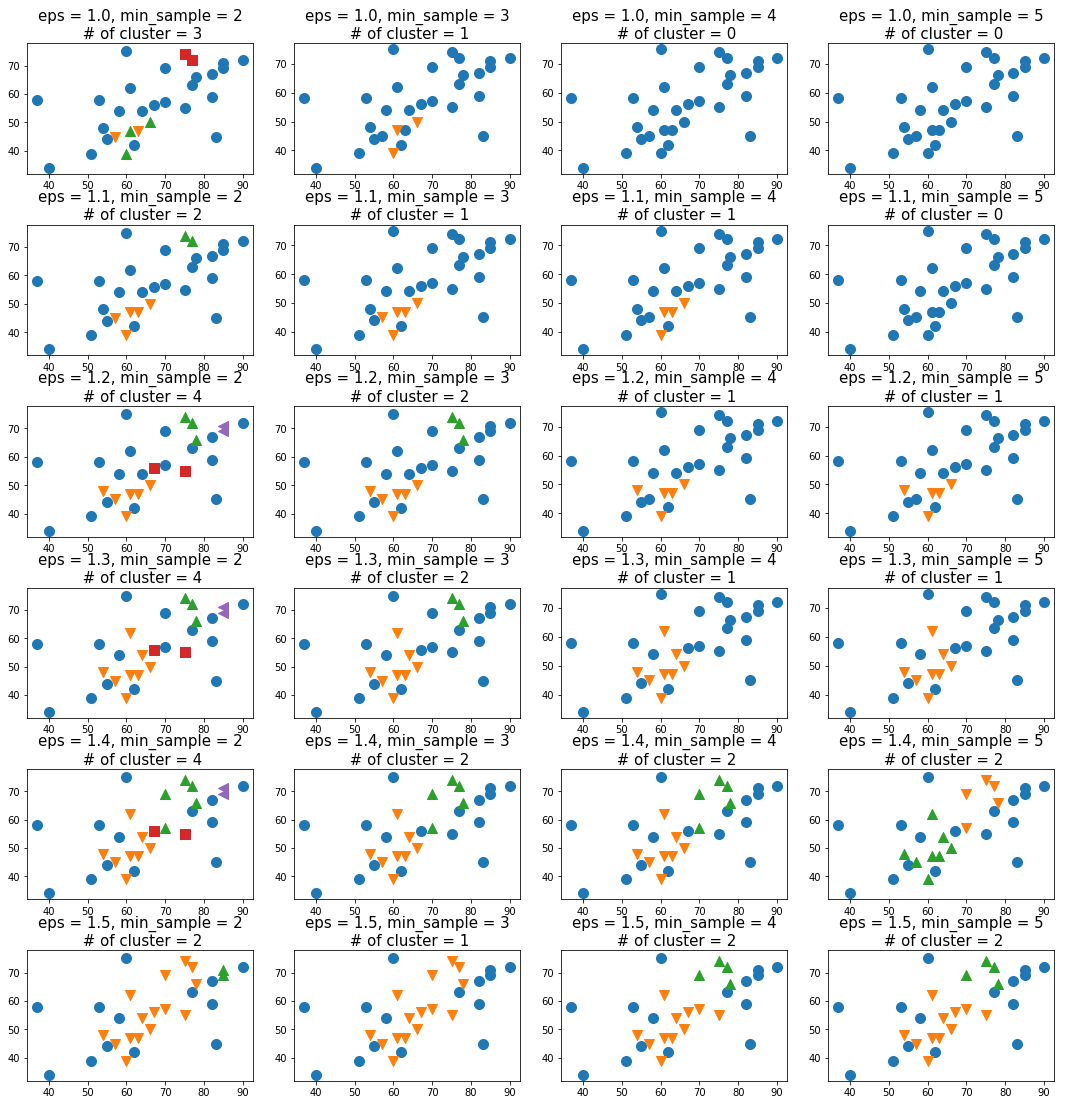

In [18]:
# X 축 : DISSATIS 변수, Y 축 : CHANCE
X = df_raw['DISSATIS']
Y = df_raw['CHANCE']
# 데이터 point 그림 종류
markers = ['o', 'v', '^', 's', '<', '>', 'p', 'D']
# eps : 1.0 ~ 1.5, min_sample : 2 ~ 5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2, 3, 4, 5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize=(15,15)) #plot 개수
fig.tight_layout(w_pad=1, h_pad=3) # plot간 간격
# enumerate() : 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps) :
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps= eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x)
        clusters = clusters + 1
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)) :
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s=100)
            axes[i, j].set_title('eps = ' + str(eps) + ", min_sample = " + str(min_sample) + \
                                "\n # of cluster = " + str(max(clusters)), fontsize=15)

In [19]:
# eps : 특정 데이터로부터 다른 데이터를 포함하는 거리, min_samples : 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)
# 군집 결과
cluster_dbscan = dbscan.labels_
# sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
# 다른 계층형, K-평균은 1번 군집부터 시작하므로 다른 군집 번호와 동일. Noise 데이터는 0번 군집으로 표기
for (i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1
df_raw['ClusterDBScan'] = cluster_dbscan
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,5,0
1,63,64,51,54,63,73,47,5,5,1
2,71,70,68,69,76,86,48,3,2,2
3,61,63,45,47,54,84,35,1,5,1
4,81,78,56,66,71,83,47,3,2,2


In [20]:
ds_summary_db = df_raw.drop(['ClusterHierarchical', 'ClusterKmeans'], axis=1, inplace=False).\
                                                    groupby('ClusterDBScan').agg(['min', 'mean', 'max'])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0 + "_" + level1
ds_summary_db.reset_index(inplace=True)
ds_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
